# Neural Networks are Function Approximation Algorithms
Taken from https://machinelearningmastery.com/neural-networks-are-function-approximators/.


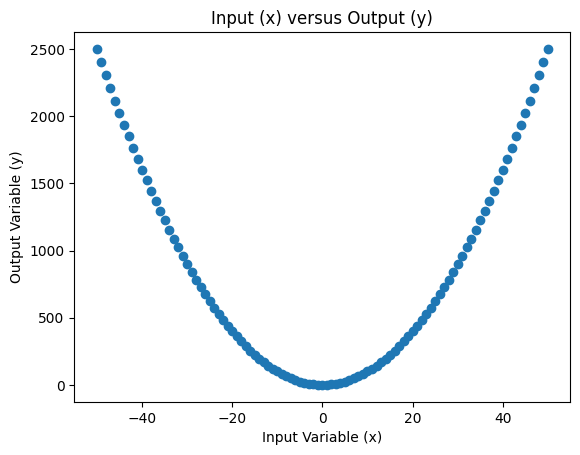

In [1]:
# example of creating a univariate dataset with a given mapping function
from matplotlib import pyplot
from numpy.ma.extras import corrcoef

# define the input data
x = [i for i in range(-50, 51)]
# define the output data
y = [i ** 2.0 for i in x]
# plot the input versus the output
pyplot.scatter(x, y)
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.show()

In [2]:
from numpy import asarray

#...
# define the dataset
x_range = [i for i in range(-50, 51)]
x = asarray(x_range)
y = asarray([i ** 2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())

#...
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))


-50 50 0.0 2500.0


In [3]:
from sklearn.preprocessing import MinMaxScaler

...
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


In [4]:
from keras.src.layers import Dense
from keras import Sequential, Input

# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras import Sequential



...
# design the neural network model
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

In [5]:
...
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')

In [ ]:
...
# ft the model on the training dataset
#model.fit(x, y, epochs=500, batch_size=10, verbose=0)
history = model.fit(x, y, epochs=500, batch_size=10, verbose=0)

print(f"Fit history: training loss: {history.history['loss'][-1]}")
print(f"Fit history: full history: {history.history}")

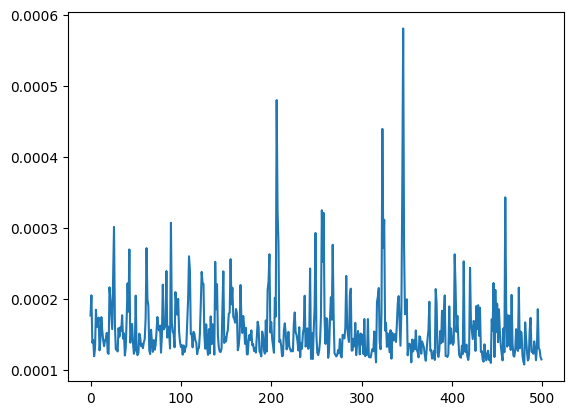

In [16]:

plot_loss = history.history['loss']
pyplot.plot(plot_loss)

In [7]:
...
# make predictions for the input data
yhat = model.predict(x)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [8]:
...
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

In [9]:
from sklearn.metrics import mean_squared_error
# from tensorflow.python.keras.losses import mean_squared_error
# from keras.src.losses import mean_squared_error
# from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.stats import pearsonr


def to1d(nd_array):
    return np.array(nd_array).ravel()


# report model error
...
# report model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))
correlation = pearsonr(to1d(y_plot), to1d(yhat_plot))
np_correlation = np.corrcoef(to1d(y_plot), to1d(yhat_plot))

print(f"SciPy pearson correlation:\n{correlation}")
print(f"NumPy correlation:\n{np_correlation}")

MSE: 2699.377
SciPy pearson correlation:
PearsonRResult(statistic=0.997735314513155, pvalue=7.136909034144002e-118)
NumPy correlation:
[[1.         0.99773531]
 [0.99773531 1.        ]]


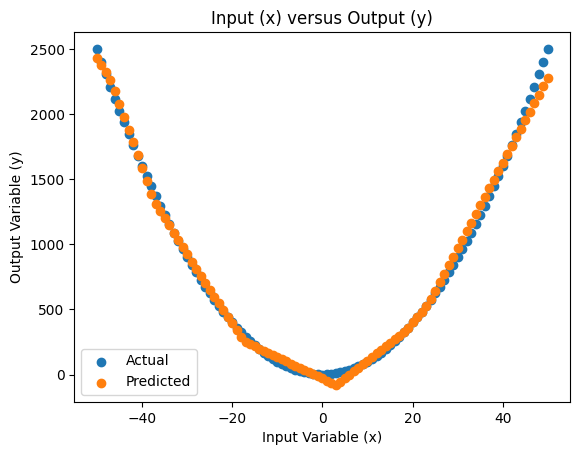

In [10]:
...
# plot x vs yhat
pyplot.scatter(x_plot, y_plot, label='Actual')
pyplot.scatter(x_plot, yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()